<a href="https://colab.research.google.com/github/munich-ml/quick-Jupyter-intro/blob/main/ECDCevaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python and Jupyter Notebook demonstration

In [65]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

## Get some example data

Load COVID-19 data from 
[**European Centre for Disease Prevention and Control**](https://www.ecdc.europa.eu/en)

In [ ]:
url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
df = pd.read_csv(url)

In [ ]:
print(df.shape)
df.head(10)

(9151, 10)


,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
0,21/12/2020,2020-51,740,111,Afghanistan,AF,AFG,38041757.0,Asia,6.56
1,14/12/2020,2020-50,1757,71,Afghanistan,AF,AFG,38041757.0,Asia,9.01
2,07/12/2020,2020-49,1672,137,Afghanistan,AF,AFG,38041757.0,Asia,7.22
3,30/11/2020,2020-48,1073,68,Afghanistan,AF,AFG,38041757.0,Asia,6.42
4,23/11/2020,2020-47,1368,69,Afghanistan,AF,AFG,38041757.0,Asia,6.66
5,16/11/2020,2020-46,1164,61,Afghanistan,AF,AFG,38041757.0,Asia,4.65
6,09/11/2020,2020-45,606,24,Afghanistan,AF,AFG,38041757.0,Asia,3.70
7,02/11/2020,2020-44,800,27,Afghanistan,AF,AFG,38041757.0,Asia,3.77
8,26/10/2020,2020-43,633,22,Afghanistan,AF,AFG,38041757.0,Asia,2.72
9,19/10/2020,2020-42,401,15,Afghanistan,AF,AFG,38041757.0,Asia,2.26


In [ ]:
df['continentExp'].value_counts()

Europe     2560
Africa     2222
America    2031
Asia       1955
Oceania     374
Other         9
Name: continentExp, dtype: int64

## Reduce the dataset
- delete unused columns
- focus on Europe

In [ ]:
drop_columns = ['year_week', 'geoId', 'countryterritoryCode', 'notification_rate_per_100000_population_14-days']
df.drop(columns=drop_columns, inplace=True)

In [ ]:
df = df[df['continentExp'] == "Europe"]
df.head()

,dateRep,cases_weekly,deaths_weekly,countriesAndTerritories,popData2019,continentExp
51,21/12/2020,4473,85,Albania,2862427.0,Europe
52,14/12/2020,5542,98,Albania,2862427.0,Europe
53,07/12/2020,5363,107,Albania,2862427.0,Europe
54,30/11/2020,4864,99,Albania,2862427.0,Europe
55,23/11/2020,4931,76,Albania,2862427.0,Europe


In [ ]:
print(set(df['countriesAndTerritories']))

{'Greece', 'Estonia', 'Gibraltar', 'Italy', 'Monaco', 'Romania', 'Serbia', 'Czechia', 'Montenegro', 'Azerbaijan', 'Bulgaria', 'Kosovo', 'Croatia', 'France', 'Switzerland', 'Andorra', 'Belgium', 'Iceland', 'Netherlands', 'Norway', 'Jersey', 'Poland', 'San_Marino', 'Finland', 'Liechtenstein', 'Latvia', 'Malta', 'Holy_See', 'Germany', 'Hungary', 'Armenia', 'Denmark', 'Lithuania', 'Spain', 'Sweden', 'Russia', 'Ireland', 'Isle_of_Man', 'Portugal', 'Bosnia_and_Herzegovina', 'Belarus', 'Moldova', 'Georgia', 'North_Macedonia', 'Slovakia', 'Albania', 'Luxembourg', 'United_Kingdom', 'Faroe_Islands', 'Turkey', 'Austria', 'Ukraine', 'Cyprus', 'Slovenia', 'Guernsey'}


## Create extra columns
- create `datetime` column
- create `incidence` columns (per population 100,000)

In [ ]:
df["datetime"] = [dt.datetime.strptime(s,'%d/%m/%Y') for s in df['dateRep']]
df["cases_per_100k"] = df['cases_weekly'] / df['popData2019'] * 100_000
df["deaths_per_100k"] = df['deaths_weekly'] / df['popData2019'] * 100_000

In [ ]:
df.head()

,dateRep,cases_weekly,deaths_weekly,countriesAndTerritories,popData2019,continentExp,datetime,cases_per_100k,deaths_per_100k
51,21/12/2020,4473,85,Albania,2862427.0,Europe,2020-12-21,156.265994,2.969508
52,14/12/2020,5542,98,Albania,2862427.0,Europe,2020-12-14,193.611924,3.423668
53,07/12/2020,5363,107,Albania,2862427.0,Europe,2020-12-07,187.358490,3.738087
54,30/11/2020,4864,99,Albania,2862427.0,Europe,2020-11-30,169.925731,3.458603
55,23/11/2020,4931,76,Albania,2862427.0,Europe,2020-11-23,172.266402,2.655090


## Peek at Germany

In [54]:
germany = df[df['countriesAndTerritories'] == "Germany"]

In [55]:
print(germany.shape)
germany.head()

(51, 9)


,dateRep,cases_weekly,deaths_weekly,countriesAndTerritories,popData2019,continentExp,datetime,cases_per_100k,deaths_per_100k
3234,21/12/2020,173574,4300,Germany,83019213.0,Europe,2020-12-21,209.076904,5.179524
3235,14/12/2020,153424,3056,Germany,83019213.0,Europe,2020-12-14,184.805414,3.681076
3236,07/12/2020,129785,2671,Germany,83019213.0,Europe,2020-12-07,156.331282,3.217328
3237,30/11/2020,124736,2136,Germany,83019213.0,Europe,2020-11-30,150.249557,2.572898
3238,23/11/2020,127806,1565,Germany,83019213.0,Europe,2020-11-23,153.947496,1.885106


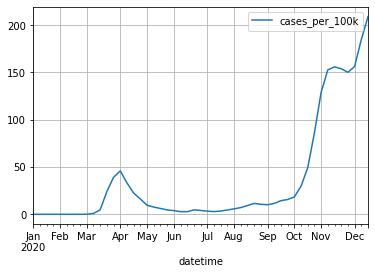

In [62]:
germany.plot(x="datetime", y="cases_per_100k", grid=True);

## Evaluation with custom plots

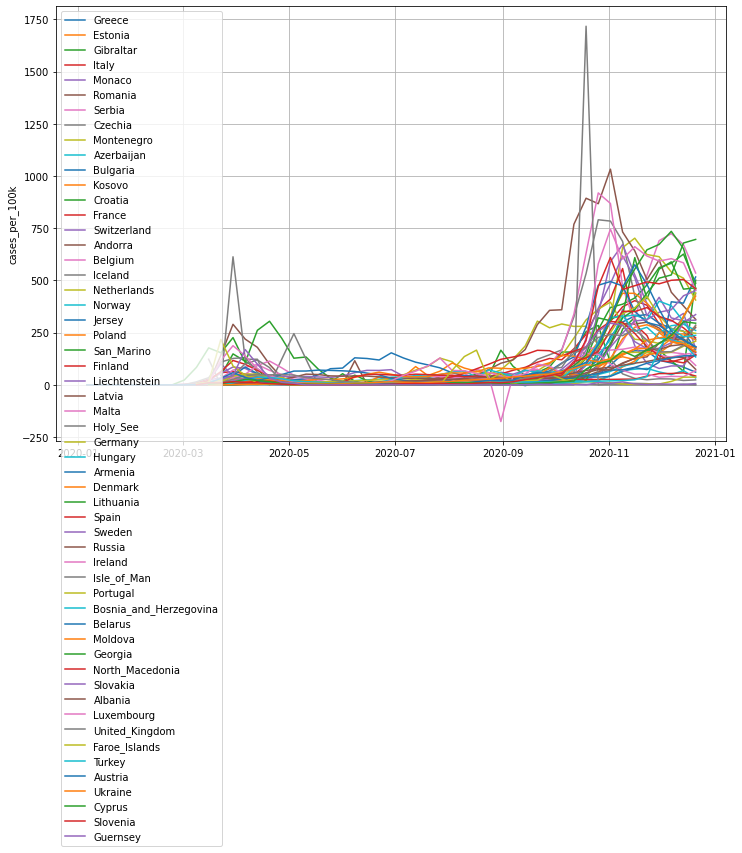

In [69]:
plt.figure(figsize=([12, 8]))
for name in set(df['countriesAndTerritories']):
    country = df[df['countriesAndTerritories'] == name]
    plt.plot(country["datetime"], country["cases_per_100k"], label=name)
plt.grid(), plt.legend(), plt.ylabel("cases_per_100k");

Too many countries! Reduce to the largest countries.

In [91]:
country_dict = {}
for country_name in set(df['countriesAndTerritories']):
    population = list(df[df['countriesAndTerritories'] == country_name]["popData2019"])[0]
    country_dict[country_name] = population

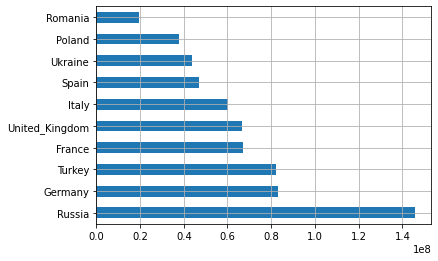

In [108]:
countries = pd.Series(data=country_dict.values(), index=country_dict.keys())
countries.sort_values(ascending=False, inplace=True)
countries = countries[:10]        # slice the largest countries
countries.plot.barh(grid=True);

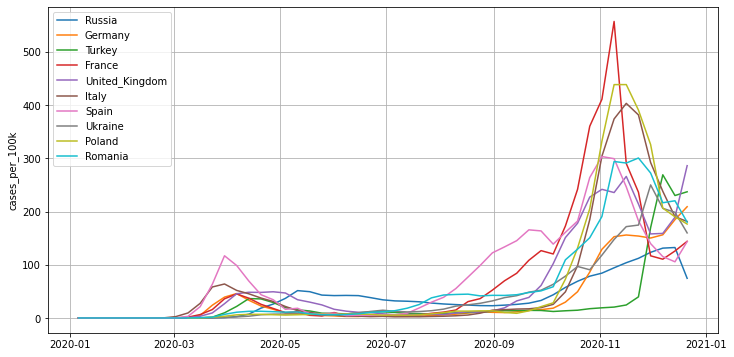

In [110]:
plt.figure(figsize=([12, 6]))
for name in countries.index:
    country = df[df['countriesAndTerritories'] == name]
    plt.plot(country["datetime"], country["cases_per_100k"], label=name)
plt.grid(), plt.legend(), plt.ylabel("cases_per_100k");

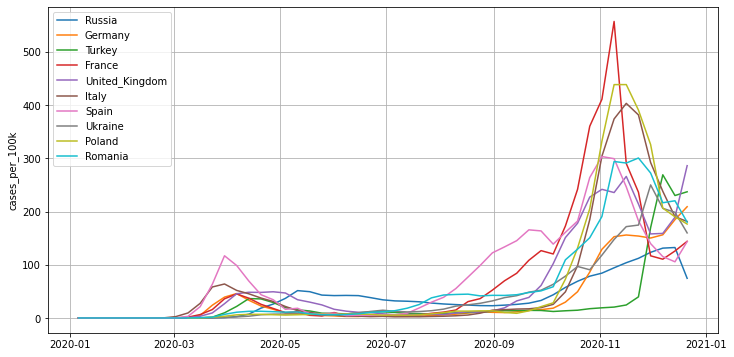

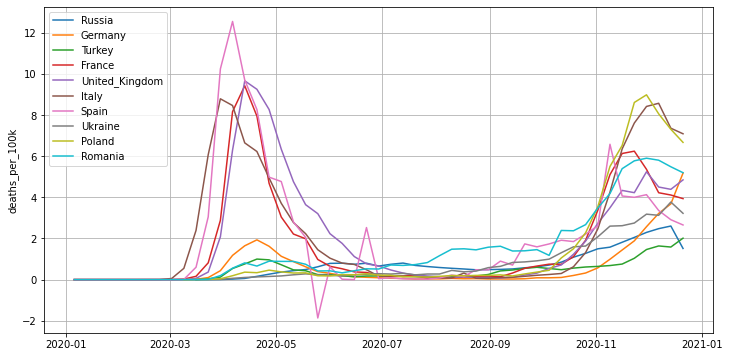

In [113]:
for ylabel in ("cases_per_100k", "deaths_per_100k"):
    plt.figure(figsize=([12, 6]))
    for name in countries.index:
        country = df[df['countriesAndTerritories'] == name]
        plt.plot(country["datetime"], country[ylabel], label=name)
    plt.grid(), plt.legend(), plt.ylabel(ylabel);